- Data Processing
- Building the Recurrent Neural Network
- Making the Prediction and Visualization

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [8]:
data = pd.read_csv('C:/Users/User/Desktop/New Books/Python Machine learning/data_path/WISDM_ar_v1.1/GOOG.csv', date_parser = True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [9]:
data_training = data[data['Date']<'2019-01-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
...,...,...,...,...,...,...,...
3612,2018-12-24,973.900024,1003.539978,970.109985,976.219971,976.219971,1590300
3613,2018-12-26,989.010010,1040.000000,983.000000,1039.459961,1039.459961,2373300
3614,2018-12-27,1017.150024,1043.890015,997.000000,1043.880005,1043.880005,2109800
3615,2018-12-28,1049.619995,1055.560059,1033.099976,1037.079956,1037.079956,1414800


In [10]:
data_testing = data[data['Date']>='2019-01-01'].copy()
data_testing

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900
...,...,...,...,...,...,...,...
3804,2019-09-30,1220.969971,1226.000000,1212.300049,1219.000000,1219.000000,1404100
3805,2019-10-01,1219.000000,1231.229980,1203.579956,1205.099976,1205.099976,1273500
3806,2019-10-02,1196.979980,1196.979980,1171.290039,1176.630005,1176.630005,1615100
3807,2019-10-03,1180.000000,1189.060059,1162.430054,1187.829956,1187.829956,1621200


In [11]:
training_data = data_training.drop(['Date', 'Adj Close'], axis=1)
training_data.head()

,Open,High,Low,Close,Volume
0,49.813286,51.835709,47.800831,49.982655,44871300
1,50.316402,54.336334,50.062355,53.952770,22942800
2,55.168217,56.528118,54.321388,54.495735,18342800
3,55.412300,55.591629,51.591621,52.239193,15319700
4,52.284027,53.798351,51.746044,52.802086,9232100


In [12]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[3.30294890e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
        5.43577404e-01],
       [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
        2.77885613e-01],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
        2.22150736e-01],
       ...,
       [7.92197108e-01, 8.11970141e-01, 7.90196475e-01, 8.15799920e-01,
        2.54672037e-02],
       [8.18777193e-01, 8.21510648e-01, 8.20249255e-01, 8.10219301e-01,
        1.70463908e-02],
       [8.19874096e-01, 8.19172449e-01, 8.12332341e-01, 8.09012935e-01,
        1.79975186e-02]])

In [13]:
x_train = []
y_train = []

In [14]:
training_data.shape[0]

3617

In [15]:
for i in range(60,training_data.shape[0]):
    x_train.append(training_data[i-60:i])
    y_train.append(training_data[i,0])

In [16]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape, y_train.shape

((3557, 60, 5), (3557,))

# Building LSTM

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [18]:
regressior = Sequential()
regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],5)))
regressior.add(Dropout(0.2))
regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))
regressior.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))
regressior.add(LSTM(units = 120, activation = 'relu'))
regressior.add(Dropout(0.2))

regressior.add(Dense(units = 1))

In [19]:
regressior.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            15840     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [22]:
regressior.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
regressior.fit(x_train, y_train, epochs=50, batch_size = 32)

Train on 3557 samples
Epoch 1/50
3557/3557 [==============================] - 29s 8ms/sample - loss: 0.0020
Epoch 2/50
3557/3557 [==============================] - 21s 6ms/sample - loss: 0.0015
Epoch 3/50
3557/3557 [==============================] - 21s 6ms/sample - loss: 0.0016
Epoch 4/50
3557/3557 [==============================] - 20s 6ms/sample - loss: 0.0015
Epoch 5/50
3557/3557 [==============================] - 21s 6ms/sample - loss: 0.0013
Epoch 6/50
3557/3557 [==============================] - 19s 5ms/sample - loss: 0.0015
Epoch 7/50
3557/3557 [==============================] - 19s 5ms/sample - loss: 0.0011
Epoch 8/50
3557/3557 [==============================] - 19s 5ms/sample - loss: 0.0012
Epoch 9/50
3557/3557 [==============================] - 20s 5ms/sample - loss: 0.0010
Epoch 10/50
3557/3557 [==============================] - 21s 6ms/sample - loss: 0.0012
Epoch 11/50
3557/3557 [==============================] - 20s 6ms/sample - loss: 0.00121s - lo
Epoch 12/50
3557/3557 [

# Prepare test dataset

In [25]:
data_testing.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900


In [26]:
data_training.tail(60)

,Date,Open,High,Low,Close,Adj Close,Volume
3557,2018-10-04,1195.329956,1197.510010,1155.576050,1168.189941,1168.189941,2209500
3558,2018-10-05,1167.500000,1173.500000,1145.119995,1157.349976,1157.349976,1184300
3559,2018-10-08,1150.109985,1168.000000,1127.364014,1148.969971,1148.969971,1932400
3560,2018-10-09,1146.150024,1154.349976,1137.572021,1138.819946,1138.819946,1308700
3561,2018-10-10,1131.079956,1132.170044,1081.130005,1081.219971,1081.219971,2675700
3562,2018-10-11,1072.939941,1106.400024,1068.270020,1079.319946,1079.319946,2949000
3563,2018-10-12,1108.000000,1115.000000,1086.401978,1110.079956,1110.079956,2101300
3564,2018-10-15,1108.910034,1113.446045,1089.000000,1092.250000,1092.250000,1372400
3565,2018-10-16,1104.589966,1124.219971,1102.500000,1121.280029,1121.280029,1928500
3566,2018-10-17,1126.459961,1128.989990,1102.189941,1115.689941,1115.689941,1467200


In [27]:
past_60_days = data_training.tail(60)

In [28]:
df = past_60_days.append(data_testing, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1195.329956,1197.510010,1155.576050,1168.189941,2209500
1,1167.500000,1173.500000,1145.119995,1157.349976,1184300
2,1150.109985,1168.000000,1127.364014,1148.969971,1932400
3,1146.150024,1154.349976,1137.572021,1138.819946,1308700
4,1131.079956,1132.170044,1081.130005,1081.219971,2675700


In [34]:
inputs = scaler.transform(df)
inputs

array([[0.93805611, 0.93755773, 0.92220906, 0.91781776, 0.0266752 ],
       [0.91527437, 0.91792904, 0.91350452, 0.90892169, 0.01425359],
       [0.90103881, 0.91343268, 0.89872289, 0.90204445, 0.02331778],
       ...,
       [0.93940683, 0.93712442, 0.93529076, 0.9247443 , 0.01947328],
       [0.92550693, 0.93064972, 0.92791493, 0.9339358 , 0.01954719],
       [0.93524016, 0.94894575, 0.95017564, 0.95130949, 0.01227612]])

In [39]:
x_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    x_test.append(inputs[i-60:i])
    y_test.append(inputs[i,0])

In [40]:
x_test, y_test = np.array(x_test), np.array(y_test)
x_test.shape, y_test.shape

((192, 60, 5), (192,))

In [41]:
y_pred = regressior.predict(x_test)

In [42]:
#Inverse 
scaler.scale_

array([8.18605127e-04, 8.17521128e-04, 8.32487534e-04, 8.20673293e-04,
       1.21162775e-08])

In [43]:
scale = 1 / 8.18605127e-04
scale

1221.5901990069017

In [44]:
y_pred = y_pred*scale
y_test = y_test*scale

# Visualization

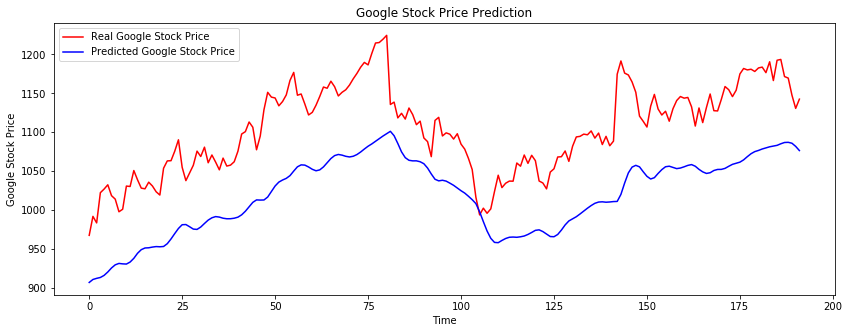

In [45]:
#Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# IMDB Review Sentiment Classification Using RNN LSTM

In [46]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [48]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 20000)

In [49]:
#Not sparse matrix coz no zeros
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [50]:
#Helps create a fixed length given the words.
x_train = pad_sequences(x_train, maxlen = 100)
x_test = pad_sequences(x_test, maxlen = 100)

In [51]:
x_train.shape

(25000, 100)

# Build LSTM Network

In [52]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dropout, Dense,Embedding

In [53]:
vocab_size = 20000
embed_size = 128

In [55]:
model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_shape = (x_train.shape[1],)))
model.add(LSTM(units=60, activation = 'tanh'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 128)          2560000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 60)                45360     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 61        
Total params: 2,605,421
Trainable params: 2,605,421
Non-trainable params: 0
_________________________________________________________________


In [57]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 64s 3ms/sample - loss: 0.4240 - accuracy: 0.7940 - val_loss: 0.3690 - val_accuracy: 0.8346
Epoch 2/5
25000/25000 [==============================] - 52s 2ms/sample - loss: 0.2277 - accuracy: 0.9116 - val_loss: 0.3670 - val_accuracy: 0.8433
Epoch 3/5
25000/25000 [==============================] - 53s 2ms/sample - loss: 0.1424 - accuracy: 0.9506 - val_loss: 0.4433 - val_accuracy: 0.8374
Epoch 4/5
25000/25000 [==============================] - 54s 2ms/sample - loss: 0.0913 - accuracy: 0.9701 - val_loss: 0.5480 - val_accuracy: 0.8332
Epoch 5/5
25000/25000 [==============================] - 53s 2ms/sample - loss: 0.0595 - accuracy: 0.9806 - val_loss: 0.6165 - val_accuracy: 0.8222


In [60]:
print('History Dict: ',history.history)

History Dict:  {'loss': [0.4240275437259674, 0.22771021409034728, 0.14238056263923646, 0.09130531509816646, 0.05949082802772522], 'accuracy': [0.794, 0.91164, 0.9506, 0.97008, 0.9806], 'val_loss': [0.369004051733017, 0.3669561052513123, 0.44334539167404174, 0.5480307200241089, 0.6164680047988892], 'val_accuracy': [0.8346, 0.84332, 0.8374, 0.83324, 0.82216]}


In [58]:
def plot_learningCurve(history, epochs):
    #Plotting training and validation accuracy values
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Val'], loc = 'upper left')
    plt.show()
    
    #Plotting Loss and validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

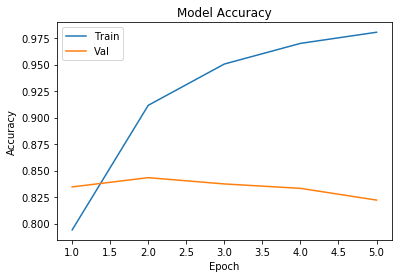

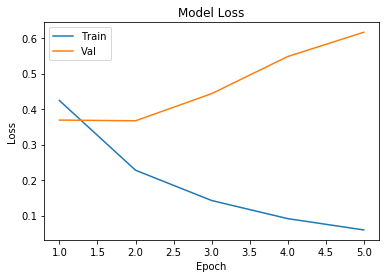

In [59]:
plot_learningCurve(history, 5)

# Airline-Passenger-Prediction Using RNN - LSTM

In [76]:
dataset = pd.read_csv('C:/Users/User/Desktop/New Books/Python Machine learning/data_path/AirPassengers.csv')
dataset 

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [83]:
dataset = dataset['#Passengers']
dataset = np.array(dataset).reshape(-1,1)
dataset

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

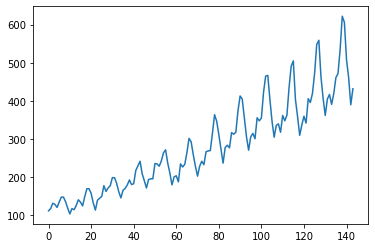

In [84]:
plt.plot(dataset)

In [85]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
dataset.min(), dataset.max()

(0.0, 1.0)

In [86]:
train_size = 100
test_size = 44

train = dataset[0:train_size, :]
test = dataset[train_size:144, :]
train.shape, test.shape

((100, 1), (44, 1))

# Build Training and Testing dataset

In [87]:
def get_data(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [88]:
look_back = 1
x_train, y_train = get_data(train, look_back)

In [89]:
x_train

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [90]:
y_train

array([0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984556,
       0.08494208, 0.08494208, 0.06177606, 0.02895753, 0.        ,
       0.02702703, 0.02123552, 0.04247104, 0.07142857, 0.05984556,
       0.04054054, 0.08687259, 0.12741313, 0.12741313, 0.1042471 ,
       0.05598456, 0.01930502, 0.06949807, 0.07915058, 0.08880309,
       0.14285714, 0.11389961, 0.13127413, 0.14285714, 0.18339768,
       0.18339768, 0.15444015, 0.11196911, 0.08108108, 0.11969112,
       0.12934363, 0.14671815, 0.17181467, 0.14864865, 0.15250965,
       0.22007722, 0.24324324, 0.26640927, 0.2027027 , 0.16795367,
       0.13127413, 0.17374517, 0.17760618, 0.17760618, 0.25482625,
       0.25289575, 0.24131274, 0.26833977, 0.30888031, 0.32432432,
       0.25675676, 0.20656371, 0.14671815, 0.18725869, 0.19305019,
       0.16216216, 0.25289575, 0.23745174, 0.25096525, 0.30888031,
       0.38223938, 0.36486486, 0.2992278 , 0.24131274, 0.19111969,
       0.24131274, 0.26640927, 0.24903475, 0.31467181, 0.31853

In [91]:
x_test, y_test = get_data(test, look_back)

In [92]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1],1)
x_train.shape, x_test.shape

((98, 1, 1), (42, 1, 1))

# Build the Model

In [93]:
model = Sequential()
model.add(LSTM(5, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [94]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [95]:
model.fit(x_train, y_train, epochs=50, batch_size=1)

Train on 98 samples
Epoch 1/50
98/98 [==============================] - 9s 92ms/sample - loss: 0.0406
Epoch 2/50
98/98 [==============================] - 0s 3ms/sample - loss: 0.0182
Epoch 3/50
98/98 [==============================] - 0s 4ms/sample - loss: 0.0152
Epoch 4/50
98/98 [==============================] - 0s 3ms/sample - loss: 0.0140
Epoch 5/50
98/98 [==============================] - 0s 3ms/sample - loss: 0.0128
Epoch 6/50
98/98 [==============================] - 0s 3ms/sample - loss: 0.0116
Epoch 7/50
98/98 [==============================] - 0s 3ms/sample - loss: 0.0104
Epoch 8/50
98/98 [==============================] - 0s 3ms/sample - loss: 0.0094
Epoch 9/50
98/98 [==============================] - 0s 4ms/sample - loss: 0.0082
Epoch 10/50
98/98 [==============================] - 0s 3ms/sample - loss: 0.0071
Epoch 11/50
98/98 [==============================] - 0s 3ms/sample - loss: 0.0062
Epoch 12/50
98/98 [==============================] - 0s 3ms/sample - loss: 0.0054
Epoc

In [96]:
y_pred = model.predict(x_test)

In [97]:
scaler.scale_

array([0.0019305])

In [98]:
y_pred = scaler.inverse_transform(y_pred)

In [99]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)
y_test = scaler.inverse_transform(y_test)

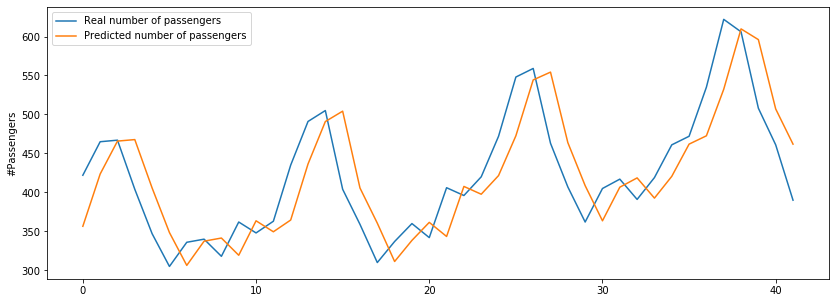

In [101]:
#Plot baseline and predictions
plt.figure(figsize=(14,5))
plt.plot(y_test, label = 'Real number of passengers')
plt.plot(y_pred, label = 'Predicted number of passengers')
plt.ylabel('#Passengers')
plt.legend()
plt.show()